In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
tqdm.pandas()
%matplotlib inline
font = {'family' : 'SimHei',
         'weight' : 'bold',
         'size'   : '16'}
plt.rc('font', **font)               # 设置字体的更多属性,
plt.rc('axes', unicode_minus=False)  # 解决坐标轴负数的负号显示问题

%config InlineBackend.figure_format = "retina"

In [6]:
data=pd.read_csv("MESData.csv",encoding='GBK', engine='python')

In [13]:
data.head()

,Unnamed: 0,time,rm,万科A,ST国华,ST星源,深振业A,*ST全新,神州高铁,中国宝安,...,平煤股份,潞安环能,中海油服,中国石油,中远海发,招商轮船,新集能源,中远海控,大唐发电,出版传媒
0,1,2008-01-02,0.803503,0.186913,0.172386,0.240032,0.322330,0.099933,0.208660,0.239424,...,0.275546,0.272717,0.231757,0.154878,0.231888,0.229171,0.210549,0.235886,0.242964,0.304614
1,2,2008-01-03,0.612735,0.187017,0.173983,0.240213,0.322330,0.101868,0.202336,0.237378,...,0.272437,0.255120,0.231757,0.152638,0.229469,0.229288,0.209557,0.236496,0.240551,0.306449
2,3,2008-01-04,0.292065,0.185973,0.174522,0.240669,0.322215,0.103774,0.191362,0.230808,...,0.271929,0.239475,0.231737,0.153266,0.222181,0.229506,0.210399,0.236610,0.240403,0.302461
3,4,2008-01-07,0.556617,0.185981,0.174325,0.240321,0.322215,0.103621,0.196665,0.230732,...,0.272207,0.243202,0.231736,0.153509,0.222941,0.229252,0.214200,0.235791,0.241044,0.302601
4,5,2008-01-08,-0.702735,0.186174,0.174831,0.240689,0.322100,0.105321,0.176191,0.222314,...,0.272931,0.240719,0.231716,0.152755,0.224816,0.229273,0.217484,0.234564,0.240670,0.302181


In [22]:
data1=data.drop(columns=['rm']).iloc[:,1:]

In [39]:
data1

,time,万科A,ST国华,ST星源,深振业A,*ST全新,神州高铁,中国宝安,深物业A,南玻A,...,平煤股份,潞安环能,中海油服,中国石油,中远海发,招商轮船,新集能源,中远海控,大唐发电,出版传媒
0,2008-01-02,0.186913,0.172386,0.240032,0.322330,0.099933,0.208660,0.239424,0.214828,0.284079,...,0.275546,0.272717,0.231757,0.154878,0.231888,0.229171,0.210549,0.235886,0.242964,0.304614
1,2008-01-03,0.187017,0.173983,0.240213,0.322330,0.101868,0.202336,0.237378,0.216728,0.285199,...,0.272437,0.255120,0.231757,0.152638,0.229469,0.229288,0.209557,0.236496,0.240551,0.306449
2,2008-01-04,0.185973,0.174522,0.240669,0.322215,0.103774,0.191362,0.230808,0.219456,0.285558,...,0.271929,0.239475,0.231737,0.153266,0.222181,0.229506,0.210399,0.236610,0.240403,0.302461
3,2008-01-07,0.185981,0.174325,0.240321,0.322215,0.103621,0.196665,0.230732,0.219479,0.281318,...,0.272207,0.243202,0.231736,0.153509,0.222941,0.229252,0.214200,0.235791,0.241044,0.302601
4,2008-01-08,0.186174,0.174831,0.240689,0.322100,0.105321,0.176191,0.222314,0.217534,0.279846,...,0.272931,0.240719,0.231716,0.152755,0.224816,0.229273,0.217484,0.234564,0.240670,0.302181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,2021-12-27,0.147207,0.188973,0.174272,0.208046,0.014958,0.109497,0.205830,0.218850,0.226454,...,0.227105,0.214365,0.217014,0.131012,0.198607,0.141476,0.253841,0.099247,0.184804,0.235503
3401,2021-12-28,0.147241,0.188870,0.174520,0.208045,0.014458,0.075691,0.205387,0.217885,0.226180,...,0.227243,0.211179,0.217013,0.130939,0.199042,0.141490,0.253620,0.099428,0.190043,0.236434
3402,2021-12-29,0.147183,0.186485,0.173994,0.208013,0.015033,0.093977,0.201213,0.218422,0.226946,...,0.227329,0.211343,0.217012,0.130900,0.197191,0.141417,0.252776,0.097593,0.190384,0.237574
3403,2021-12-30,0.147339,0.187317,0.174035,0.208013,0.014591,0.104321,0.202675,0.218603,0.215793,...,0.227010,0.208973,0.217010,0.130877,0.197926,0.141445,0.250927,0.097652,0.191756,0.240245


In [165]:
names_data=pd.read_excel("回归数据.xlsx")
names_data=names_data.iloc[:,1:3]
names_data

,证券名称,行业
0,万科A,房地产业
1,万科A,房地产业
2,万科A,房地产业
3,万科A,房地产业
4,万科A,房地产业
...,...,...
18797,出版传媒,新闻和出版业
18798,出版传媒,新闻和出版业
18799,出版传媒,新闻和出版业
18800,出版传媒,新闻和出版业


In [36]:
names=[]
for i in names_data.drop_duplicates(subset='证券名称', keep='first', inplace=False)["证券名称"]:
    names.append(i)
names.insert(0,"time")

In [27]:
len(set(names_data["行业"]))

74

In [38]:
len(names)

1344

In [40]:
data1.columns=names

# MES均值最大最小的10个企业

In [51]:
data1["万科A"].describe()

count    3405.000000
mean        0.169651
std         0.024026
min         0.115453
25%         0.156738
50%         0.171352
75%         0.184656
max         0.210140
Name: 万科A, dtype: float64

In [110]:
firm_mean={}
for i in names[1:]:
    firm_mean[i]=data1[i].describe()[1]
firm_mean_sorted= sorted(firm_mean.items(), key=lambda x: x[1], reverse=True)
firm_mean_sorted[:10]

[('中国中期', 0.3275609241618897),
 ('华丽家族', 0.3138031018473325),
 ('中体产业', 0.30066622010718214),
 ('紫鑫药业', 0.3006291512066851),
 ('云铝股份', 0.29881093105412815),
 ('维科技术', 0.2953618079653293),
 ('澳洋健康', 0.2951764859187616),
 ('空港股份', 0.2942194574821697),
 ('红星发展', 0.29381374562081325),
 ('海得控制', 0.29323947591861327)]

In [111]:
firm_max10=pd.DataFrame(np.zeros(10*8).reshape(10,8))
firm_max10.columns=["count","mean","std","min","25%","50%","75%","max"]
firm_max10.index=[str(i[0]) for i in firm_mean_sorted[:10]]
for i in range(len(firm_mean_sorted[:10])):
    for j in range(len(firm_max10.columns)):
        firm_max10.iloc[i,j]=data1[firm_mean_sorted[:10][i][0]].describe()[j]
firm_max10

,count,mean,std,min,25%,50%,75%,max
中国中期,3405.0,0.327561,0.214213,-0.264893,0.161344,0.377376,0.480320,0.740022
华丽家族,3405.0,0.313803,0.105580,-0.075755,0.249994,0.339267,0.392422,0.489857
中体产业,3405.0,0.300666,0.015869,0.250632,0.288077,0.297246,0.311928,0.350827
紫鑫药业,3405.0,0.300629,0.025458,0.159295,0.281026,0.294188,0.316549,0.387834
云铝股份,3405.0,0.298811,0.008991,0.282342,0.292135,0.297670,0.303962,0.318884
维科技术,3405.0,0.295362,0.001418,0.250892,0.295148,0.295378,0.295589,0.300239
澳洋健康,3405.0,0.295176,0.020469,0.135151,0.280955,0.289806,0.307420,0.370768
空港股份,3405.0,0.294219,0.010438,0.109005,0.287842,0.293224,0.300016,0.340171
红星发展,3405.0,0.293814,0.025535,0.185085,0.279637,0.289458,0.307220,0.380221
海得控制,3405.0,0.293239,0.049191,0.137976,0.276354,0.309824,0.328779,0.347325


In [338]:
round(firm_max10,5)

,count,mean,std,min,25%,50%,75%,max
中国中期,3405.0,0.32756,0.21421,-0.26489,0.16134,0.37738,0.48032,0.74002
华丽家族,3405.0,0.31380,0.10558,-0.07575,0.24999,0.33927,0.39242,0.48986
中体产业,3405.0,0.30067,0.01587,0.25063,0.28808,0.29725,0.31193,0.35083
紫鑫药业,3405.0,0.30063,0.02546,0.15930,0.28103,0.29419,0.31655,0.38783
云铝股份,3405.0,0.29881,0.00899,0.28234,0.29213,0.29767,0.30396,0.31888
维科技术,3405.0,0.29536,0.00142,0.25089,0.29515,0.29538,0.29559,0.30024
澳洋健康,3405.0,0.29518,0.02047,0.13515,0.28096,0.28981,0.30742,0.37077
空港股份,3405.0,0.29422,0.01044,0.10901,0.28784,0.29322,0.30002,0.34017
红星发展,3405.0,0.29381,0.02554,0.18509,0.27964,0.28946,0.30722,0.38022
海得控制,3405.0,0.29324,0.04919,0.13798,0.27635,0.30982,0.32878,0.34732


In [113]:
firm_mean_sorted[:-11:-1]

[('云南白药', 0.09530514168807445),
 ('双汇发展', 0.09761226683411527),
 ('贵州茅台', 0.10032950071049819),
 ('恒瑞医药', 0.10380507994618952),
 ('*ST全新', 0.10778048319337341),
 ('*ST厦华', 0.11538249520974675),
 ('上海家化', 0.11590726906177781),
 ('天士力', 0.12331334833727683),
 ('华兰生物', 0.12426251514747151),
 ('*ST皇台', 0.1270159357857416)]

In [115]:
firm_min10=pd.DataFrame(np.zeros(10*8).reshape(10,8))
firm_min10.columns=["count","mean","std","min","25%","50%","75%","max"]
firm_min10.index=[str(i[0]) for i in firm_mean_sorted[:-11:-1]]
for i in range(len(firm_mean_sorted[:-11:-1])):
    for j in range(len(firm_min10.columns)):
        firm_min10.iloc[i,j]=data1[firm_mean_sorted[:-11:-1][i][0]].describe()[j]
firm_min10

,count,mean,std,min,25%,50%,75%,max
云南白药,3405.0,0.095305,0.019678,0.046122,0.082764,0.090779,0.101601,0.144658
双汇发展,3405.0,0.097612,0.027690,-0.041796,0.084392,0.095966,0.108304,0.216279
贵州茅台,3405.0,0.100330,0.005677,0.075119,0.097566,0.099911,0.102730,0.124580
恒瑞医药,3405.0,0.103805,0.006365,0.063037,0.101289,0.102928,0.105127,0.161983
*ST全新,3405.0,0.107780,0.068361,-0.002967,0.039545,0.116199,0.154078,0.226842
*ST厦华,3405.0,0.115382,0.038735,-0.018806,0.094677,0.108505,0.131041,0.286126
上海家化,3405.0,0.115907,0.014166,0.014457,0.110125,0.115815,0.120646,0.224414
天士力,3405.0,0.123313,0.037376,0.035795,0.102008,0.115743,0.139171,0.219482
华兰生物,3405.0,0.124263,0.023473,0.028777,0.113097,0.123390,0.134499,0.224255
*ST皇台,3405.0,0.127016,0.093805,-0.027336,0.069377,0.103579,0.168115,0.343556


In [339]:
round(firm_min10,5)

,count,mean,std,min,25%,50%,75%,max
云南白药,3405.0,0.09531,0.01968,0.04612,0.08276,0.09078,0.10160,0.14466
双汇发展,3405.0,0.09761,0.02769,-0.04180,0.08439,0.09597,0.10830,0.21628
贵州茅台,3405.0,0.10033,0.00568,0.07512,0.09757,0.09991,0.10273,0.12458
恒瑞医药,3405.0,0.10381,0.00636,0.06304,0.10129,0.10293,0.10513,0.16198
*ST全新,3405.0,0.10778,0.06836,-0.00297,0.03955,0.11620,0.15408,0.22684
*ST厦华,3405.0,0.11538,0.03873,-0.01881,0.09468,0.10850,0.13104,0.28613
上海家化,3405.0,0.11591,0.01417,0.01446,0.11012,0.11581,0.12065,0.22441
天士力,3405.0,0.12331,0.03738,0.03580,0.10201,0.11574,0.13917,0.21948
华兰生物,3405.0,0.12426,0.02347,0.02878,0.11310,0.12339,0.13450,0.22426
*ST皇台,3405.0,0.12702,0.09381,-0.02734,0.06938,0.10358,0.16811,0.34356


# MES均值最大最小的行业

In [121]:
data1.head()

,time,万科A,ST国华,ST星源,深振业A,*ST全新,神州高铁,中国宝安,深物业A,南玻A,...,平煤股份,潞安环能,中海油服,中国石油,中远海发,招商轮船,新集能源,中远海控,大唐发电,出版传媒
0,2008-01-02,0.186913,0.172386,0.240032,0.322330,0.099933,0.208660,0.239424,0.214828,0.284079,...,0.275546,0.272717,0.231757,0.154878,0.231888,0.229171,0.210549,0.235886,0.242964,0.304614
1,2008-01-03,0.187017,0.173983,0.240213,0.322330,0.101868,0.202336,0.237378,0.216728,0.285199,...,0.272437,0.255120,0.231757,0.152638,0.229469,0.229288,0.209557,0.236496,0.240551,0.306449
2,2008-01-04,0.185973,0.174522,0.240669,0.322215,0.103774,0.191362,0.230808,0.219456,0.285558,...,0.271929,0.239475,0.231737,0.153266,0.222181,0.229506,0.210399,0.236610,0.240403,0.302461
3,2008-01-07,0.185981,0.174325,0.240321,0.322215,0.103621,0.196665,0.230732,0.219479,0.281318,...,0.272207,0.243202,0.231736,0.153509,0.222941,0.229252,0.214200,0.235791,0.241044,0.302601
4,2008-01-08,0.186174,0.174831,0.240689,0.322100,0.105321,0.176191,0.222314,0.217534,0.279846,...,0.272931,0.240719,0.231716,0.152755,0.224816,0.229273,0.217484,0.234564,0.240670,0.302181


In [166]:
names_data.head()

,证券名称,行业
0,万科A,房地产业
1,万科A,房地产业
2,万科A,房地产业
3,万科A,房地产业
4,万科A,房地产业


In [173]:
names_data[::14]
names1=names_data[::14]

In [176]:
names1

,证券名称,行业
0,万科A,房地产业
14,ST国华,软件和信息技术服务业
28,ST星源,生态保护和环境治理业
42,深振业A,房地产业
56,*ST全新,房地产业
...,...,...
18732,招商轮船,水上运输业
18746,新集能源,煤炭开采和洗选业
18760,中远海控,水上运输业
18774,大唐发电,电力、热力生产和供应业


In [185]:
industry_name={}
for j in set(names1["行业"]):
    industry_name[j]=[i for i in names1[names1["行业"]==j]["证券名称"]]
industry_name

{'计算机、通信和其他电子设备制造业': ['深康佳A',
  '深华发A',
  '深科技',
  '深纺织A',
  '深天马A',
  '中兴通讯',
  '中国长城',
  'TCL科技',
  '东旭光电',
  '航天发展',
  '烽火电子',
  '汇源通信',
  '风华高科',
  '*ST华讯',
  '京东方A',
  '冠捷科技',
  '振华科技',
  '四川九洲',
  '创维数字',
  '超声电子',
  '紫光股份',
  '中科三环',
  '浪潮信息',
  '华工科技',
  '东信和平',
  '航天电器',
  '联创电子',
  '国光电器',
  '紫光国微',
  '*ST同洲',
  '得润电子',
  '大港股份',
  '苏州固锝',
  'ST新海',
  '恒宝股份',
  '莱宝高科',
  '康强电子',
  '沃尔核材',
  '天津普林',
  '实益达',
  '顺络电子',
  '北斗星通',
  '通富微电',
  '远望谷',
  '中航光电',
  '纳思达',
  '华天科技',
  '中光学',
  '武汉凡谷',
  '东晶电子',
  '海信视像',
  '同方股份',
  '中国卫星',
  '波导股份',
  '航天机电',
  '上海贝岭',
  '生益科技',
  '大唐电信',
  '福日电子',
  '科新发展',
  '铜峰电子',
  '*ST凯乐',
  '航天信息',
  '大恒科技',
  '天通股份',
  '长江通信',
  '旭光电子',
  '精伦电子',
  '华微电子',
  '联创光电',
  '动力源',
  '北方导航',
  '士兰微',
  '烽火通信',
  '长园集团',
  '凯盛科技',
  '国睿科技',
  '法拉电子',
  '长电科技',
  '*ST方科',
  '*ST瑞德',
  '三安光电',
  '彩虹股份',
  '*ST实达',
  '闻泰科技',
  '中国海防',
  '南京熊猫',
  '东方通信',
  '四川长虹',
  '*ST厦华',
  '声光电科',
  '新疆众和',
  '国美通讯',
  '北矿科技',
  '四创电子'],
 '电信、广播电视和卫星传输服务': ['ST国安', 

In [215]:
industry_mean={}
for i in industry_name:
    industry_mean[i]=np.mean([data1[u].describe()[1]  for u in industry_name[i]])

industry_mean_sorted=sorted(industry_mean.items(),key=lambda x: x[1],reverse=True)
industry_mean_sorted[:10]

[('体育', 0.30066622010718214),
 ('建筑安装业', 0.28193168452990564),
 ('黑色金属矿采选业', 0.26906549457877643),
 ('有色金属冶炼和压延加工业', 0.25132484818098544),
 ('煤炭开采和洗选业', 0.24807039879023945),
 ('化学纤维制造业', 0.24701067810344732),
 ('通用设备制造业', 0.243685515667537),
 ('家具制造业', 0.2404746742231251),
 ('综合', 0.23945943036746203),
 ('非金属矿物制品业', 0.23705938990516837)]

In [227]:
industry_max10=pd.DataFrame(np.zeros(10*8).reshape(10,8))
industry_max10.columns=["count","mean","std","min","25%","50%","75%","max"]
industry_max10.index=[str(i[0]) for i in industry_mean_sorted[:10]]
industry_max10

,count,mean,std,min,25%,50%,75%,max
体育,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
建筑安装业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
黑色金属矿采选业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
有色金属冶炼和压延加工业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
煤炭开采和洗选业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
化学纤维制造业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
通用设备制造业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
家具制造业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
综合,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
非金属矿物制品业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
industry_mean_sorted[:10]

[('体育', 0.30066622010718214),
 ('建筑安装业', 0.28193168452990564),
 ('黑色金属矿采选业', 0.26906549457877643),
 ('有色金属冶炼和压延加工业', 0.25132484818098544),
 ('煤炭开采和洗选业', 0.24807039879023945),
 ('化学纤维制造业', 0.24701067810344732),
 ('通用设备制造业', 0.243685515667537),
 ('家具制造业', 0.2404746742231251),
 ('综合', 0.23945943036746203),
 ('非金属矿物制品业', 0.23705938990516837)]

In [274]:
for i in range(len(industry_mean_sorted[:10])):
    for j in range(len(industry_max10.columns)):
        num=[]
        for u in industry_name[industry_mean_sorted[:10][i][0]]:
            for v in range(len(data1[u])):
                num.append(data1[u][v])
        
        industry_max10.iloc[i,j]=pd.DataFrame(num).describe()[0][j]
industry_max10

,count,mean,std,min,25%,50%,75%,max
体育,3405.0,0.300666,0.015869,0.250632,0.288077,0.297246,0.311928,0.350827
建筑安装业,3405.0,0.281932,0.010906,0.205121,0.276083,0.280358,0.287390,0.333480
黑色金属矿采选业,10215.0,0.269065,0.049980,0.061847,0.250687,0.280018,0.294025,0.392892
有色金属冶炼和压延加工业,115770.0,0.251325,0.048112,-0.169482,0.228286,0.259879,0.278614,0.414440
煤炭开采和洗选业,68100.0,0.248070,0.033279,-0.017480,0.229961,0.251546,0.269472,0.378980
化学纤维制造业,47670.0,0.247011,0.046711,-0.125208,0.216706,0.253981,0.280122,0.377908
通用设备制造业,108960.0,0.243686,0.041939,-0.016226,0.222361,0.247960,0.269425,0.379048
家具制造业,3405.0,0.240475,0.013768,0.038291,0.234176,0.238890,0.246463,0.313244
综合,44265.0,0.239459,0.056938,-0.010346,0.214508,0.244225,0.277523,0.396401
非金属矿物制品业,119175.0,0.237059,0.040856,-0.043157,0.215920,0.240346,0.262456,0.377718


In [341]:
round(industry_max10,4)

,count,mean,std,min,25%,50%,75%,max
体育,3405.0,0.3007,0.0159,0.2506,0.2881,0.2972,0.3119,0.3508
建筑安装业,3405.0,0.2819,0.0109,0.2051,0.2761,0.2804,0.2874,0.3335
黑色金属矿采选业,10215.0,0.2691,0.0500,0.0618,0.2507,0.2800,0.2940,0.3929
有色金属冶炼和压延加工业,115770.0,0.2513,0.0481,-0.1695,0.2283,0.2599,0.2786,0.4144
煤炭开采和洗选业,68100.0,0.2481,0.0333,-0.0175,0.2300,0.2515,0.2695,0.3790
化学纤维制造业,47670.0,0.2470,0.0467,-0.1252,0.2167,0.2540,0.2801,0.3779
通用设备制造业,108960.0,0.2437,0.0419,-0.0162,0.2224,0.2480,0.2694,0.3790
家具制造业,3405.0,0.2405,0.0138,0.0383,0.2342,0.2389,0.2465,0.3132
综合,44265.0,0.2395,0.0569,-0.0103,0.2145,0.2442,0.2775,0.3964
非金属矿物制品业,119175.0,0.2371,0.0409,-0.0432,0.2159,0.2403,0.2625,0.3777


In [275]:
industry_mean_sorted[:-11:-1]

[('废弃资源综合利用业', 0.162931112961854),
 ('研究和试验发展', 0.16508430916406264),
 ('林业', 0.17315971673560546),
 ('食品制造业', 0.18357038315827903),
 ('房屋建筑业', 0.1918531275018012),
 ('石油和天然气开采业', 0.1940496302565403),
 ('酒、饮料和精制茶制造业', 0.19444037204849052),
 ('纺织服装、服饰业', 0.19487273468286465),
 ('医药制造业', 0.19570130095478766),
 ('卫生', 0.1967962646481014)]

In [277]:
industry_min10=pd.DataFrame(np.zeros(10*8).reshape(10,8))
industry_min10.columns=["count","mean","std","min","25%","50%","75%","max"]
industry_min10.index=[str(i[0]) for i in industry_mean_sorted[:-11:-1]]
industry_min10

,count,mean,std,min,25%,50%,75%,max
废弃资源综合利用业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
研究和试验发展,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
林业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
食品制造业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
房屋建筑业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
石油和天然气开采业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
酒、饮料和精制茶制造业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
纺织服装、服饰业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
医药制造业,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
卫生,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [278]:
for i in range(len(industry_mean_sorted[:-11:-1])):
    for j in range(len(industry_min10.columns)):
        num=[]
        for u in industry_name[industry_mean_sorted[:-11:-1][i][0]]:
            for v in range(len(data1[u])):
                num.append(data1[u][v])
        
        industry_min10.iloc[i,j]=pd.DataFrame(num).describe()[0][j]
industry_min10

,count,mean,std,min,25%,50%,75%,max
废弃资源综合利用业,3405.0,0.162931,0.018396,0.064505,0.153583,0.161378,0.173366,0.224784
研究和试验发展,6810.0,0.165084,0.037800,-0.049272,0.143022,0.171332,0.188833,0.316259
林业,10215.0,0.173160,0.056881,-0.396093,0.154888,0.175766,0.191387,0.432456
食品制造业,51075.0,0.183570,0.048801,-0.176278,0.153955,0.184386,0.211695,0.399938
房屋建筑业,3405.0,0.191853,0.028722,-0.300922,0.188617,0.192980,0.196731,0.380978
石油和天然气开采业,20430.0,0.194050,0.053086,-0.028080,0.149003,0.196169,0.227803,0.412248
酒、饮料和精制茶制造业,105555.0,0.194440,0.051747,-0.067962,0.163754,0.196831,0.228496,0.349693
纺织服装、服饰业,30645.0,0.194873,0.047666,-0.160285,0.164743,0.188687,0.224585,0.352781
医药制造业,309855.0,0.195701,0.051727,-0.222048,0.163449,0.197867,0.228521,0.434540
卫生,23835.0,0.196796,0.064322,-0.010074,0.156531,0.193955,0.235992,0.378414


In [342]:
round(industry_min10,4)

,count,mean,std,min,25%,50%,75%,max
废弃资源综合利用业,3405.0,0.1629,0.0184,0.0645,0.1536,0.1614,0.1734,0.2248
研究和试验发展,6810.0,0.1651,0.0378,-0.0493,0.1430,0.1713,0.1888,0.3163
林业,10215.0,0.1732,0.0569,-0.3961,0.1549,0.1758,0.1914,0.4325
食品制造业,51075.0,0.1836,0.0488,-0.1763,0.1540,0.1844,0.2117,0.3999
房屋建筑业,3405.0,0.1919,0.0287,-0.3009,0.1886,0.1930,0.1967,0.3810
石油和天然气开采业,20430.0,0.1940,0.0531,-0.0281,0.1490,0.1962,0.2278,0.4122
酒、饮料和精制茶制造业,105555.0,0.1944,0.0517,-0.0680,0.1638,0.1968,0.2285,0.3497
纺织服装、服饰业,30645.0,0.1949,0.0477,-0.1603,0.1647,0.1887,0.2246,0.3528
医药制造业,309855.0,0.1957,0.0517,-0.2220,0.1634,0.1979,0.2285,0.4345
卫生,23835.0,0.1968,0.0643,-0.0101,0.1565,0.1940,0.2360,0.3784


# 按照年份进行统计并画图

In [279]:
data1

,time,万科A,ST国华,ST星源,深振业A,*ST全新,神州高铁,中国宝安,深物业A,南玻A,...,平煤股份,潞安环能,中海油服,中国石油,中远海发,招商轮船,新集能源,中远海控,大唐发电,出版传媒
0,2008-01-02,0.186913,0.172386,0.240032,0.322330,0.099933,0.208660,0.239424,0.214828,0.284079,...,0.275546,0.272717,0.231757,0.154878,0.231888,0.229171,0.210549,0.235886,0.242964,0.304614
1,2008-01-03,0.187017,0.173983,0.240213,0.322330,0.101868,0.202336,0.237378,0.216728,0.285199,...,0.272437,0.255120,0.231757,0.152638,0.229469,0.229288,0.209557,0.236496,0.240551,0.306449
2,2008-01-04,0.185973,0.174522,0.240669,0.322215,0.103774,0.191362,0.230808,0.219456,0.285558,...,0.271929,0.239475,0.231737,0.153266,0.222181,0.229506,0.210399,0.236610,0.240403,0.302461
3,2008-01-07,0.185981,0.174325,0.240321,0.322215,0.103621,0.196665,0.230732,0.219479,0.281318,...,0.272207,0.243202,0.231736,0.153509,0.222941,0.229252,0.214200,0.235791,0.241044,0.302601
4,2008-01-08,0.186174,0.174831,0.240689,0.322100,0.105321,0.176191,0.222314,0.217534,0.279846,...,0.272931,0.240719,0.231716,0.152755,0.224816,0.229273,0.217484,0.234564,0.240670,0.302181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3400,2021-12-27,0.147207,0.188973,0.174272,0.208046,0.014958,0.109497,0.205830,0.218850,0.226454,...,0.227105,0.214365,0.217014,0.131012,0.198607,0.141476,0.253841,0.099247,0.184804,0.235503
3401,2021-12-28,0.147241,0.188870,0.174520,0.208045,0.014458,0.075691,0.205387,0.217885,0.226180,...,0.227243,0.211179,0.217013,0.130939,0.199042,0.141490,0.253620,0.099428,0.190043,0.236434
3402,2021-12-29,0.147183,0.186485,0.173994,0.208013,0.015033,0.093977,0.201213,0.218422,0.226946,...,0.227329,0.211343,0.217012,0.130900,0.197191,0.141417,0.252776,0.097593,0.190384,0.237574
3403,2021-12-30,0.147339,0.187317,0.174035,0.208013,0.014591,0.104321,0.202675,0.218603,0.215793,...,0.227010,0.208973,0.217010,0.130877,0.197926,0.141445,0.250927,0.097652,0.191756,0.240245


In [295]:
row_mean = data1.mean(axis=1)

In [306]:
row_mean

0       0.246841
1       0.247746
2       0.248012
3       0.246703
4       0.246567
          ...   
3400    0.185242
3401    0.185195
3402    0.184788
3403    0.184936
3404    0.185317
Length: 3405, dtype: float64

In [320]:
time= [datetime.datetime.strptime(i, '%Y-%m-%d') for i in data1.iloc[:,0]]

In [321]:
time_mean=[i for i in data1.mean(axis=1)]

In [319]:
time_mean

[0.24684102303063665,
 0.24774649766931112,
 0.24801202005955905,
 0.2467033614830858,
 0.24656717773762793,
 0.24760356963496175,
 0.2488217825497786,
 0.24726946548597498,
 0.246112242276824,
 0.24585396729982484,
 0.24459802510963954,
 0.2432866812032594,
 0.24377379961848697,
 0.2434347483903554,
 0.24862216120656686,
 0.2687234379089164,
 0.2677131530643191,
 0.26454991458732985,
 0.2604473855635101,
 0.27087387861836915,
 0.26656572997212785,
 0.2630097964301718,
 0.26291114205258787,
 0.2642740204220478,
 0.2760533472391525,
 0.27059334070419033,
 0.2668082487468772,
 0.26550310869502397,
 0.26286860544778223,
 0.26341828027468195,
 0.2621322181257522,
 0.26020904812510587,
 0.2580069596369188,
 0.2576205287028616,
 0.25880678462406637,
 0.25650351808704924,
 0.2568528976359745,
 0.25511595928112946,
 0.25470883205229605,
 0.2564999977830532,
 0.2535797977952974,
 0.25129063329731893,
 0.25030757663846065,
 0.2506027836724921,
 0.2534085611057915,
 0.24993566953784682,
 0.251336

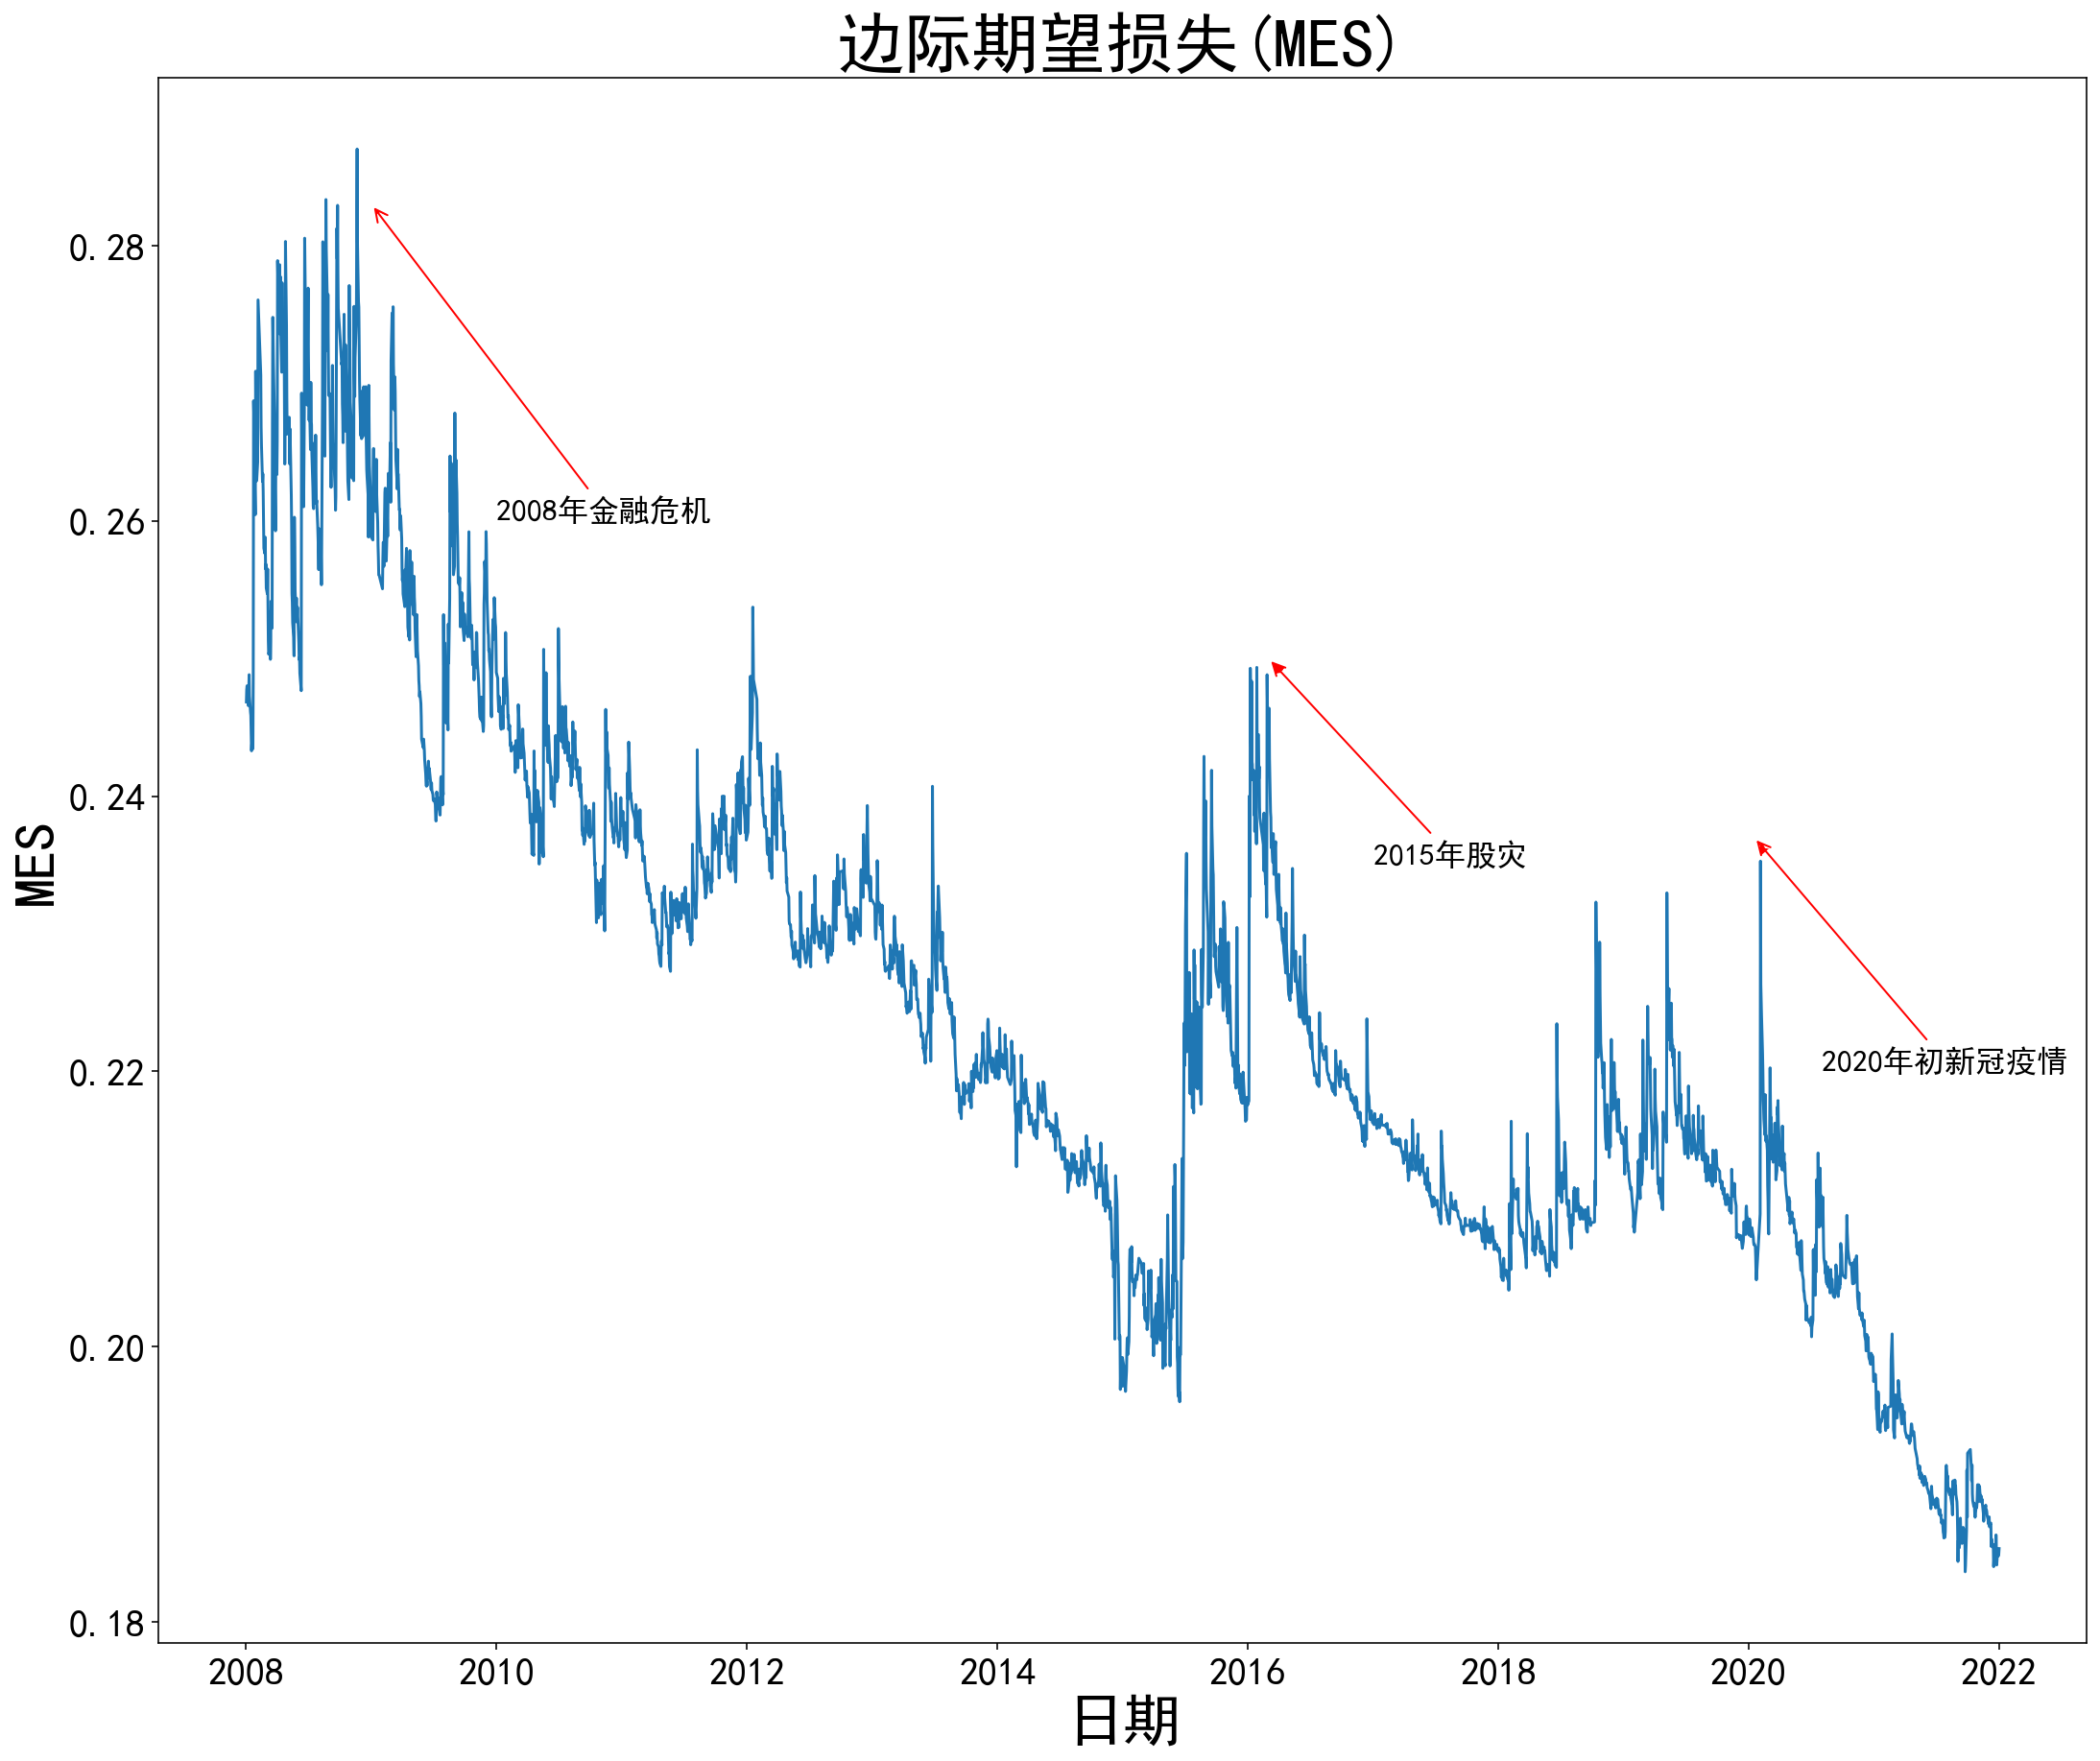

In [379]:
plt.figure(figsize=(18,15))
plt.plot(time, time_mean)
plt.xlabel("日期",fontsize=30)
plt.ylabel('MES',fontsize=30)
plt.title("边际期望损失(MES)",fontsize=35)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.annotate('2008年金融危机', xy=(datetime.datetime.strptime("2009-01-01", '%Y-%m-%d'), 0.283), 
             xytext=(datetime.datetime.strptime("2010-01-01", '%Y-%m-%d'), 0.26), arrowprops=dict(arrowstyle="->", color="r", hatch='*',))
plt.annotate('2015年股灾', xy=(datetime.datetime.strptime("2016-03-01", '%Y-%m-%d'), 0.25), 
             xytext=(datetime.datetime.strptime("2017-01-01", '%Y-%m-%d'), 0.235), arrowprops=dict(arrowstyle="->", color="r", hatch='*',))
plt.annotate('2020年初新冠疫情', xy=(datetime.datetime.strptime("2020-01-16", '%Y-%m-%d'), 0.237), 
             xytext=(datetime.datetime.strptime("2020-08-01", '%Y-%m-%d'), 0.22), arrowprops=dict(arrowstyle="->", color="r", hatch='*',))
plt.savefig("边际期望损失.jpg")
plt.show()